In [1]:
import numpy as np

arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [2]:
np.linalg.cond(np.dot(arr.T, arr))

29104.19736331761

In [3]:
np.linalg.inv(np.dot(arr.T, arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [4]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.46684896, -0.06359872, -0.00341803],
       [-0.06359872,  0.06375331, -0.05752395],
       [-0.00341803, -0.05752395,  0.06408812]])

In [5]:
arr = np.array([[ 0.46684896, -0.06359872, -0.00341803],
       [-0.06359872,  0.06375331, -0.05752395],
       [-0.00341803, -0.05752395,  0.06408812]])
np.linalg.cond(arr)

341.04169922403804

# Condition Number

In [6]:
# smallest eigenvalues / largest eigenvalues
A = np.array([[1,2],
            [3,4]])
condition_number = np.linalg.cond(arr)
print('condition number:',condition_number)

condition number: 341.04169922403804


1. correlation

In [7]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.47202303, -0.06705466, -0.00051139],
       [-0.06705466,  0.06552638, -0.05891698],
       [-0.00051139, -0.05891698,  0.06515911]])

Condition Number

In [8]:
A = np.array([[1,2],
             [3,4]])
condition_number = np.linalg.cond(arr)
print('condition number:',condition_number)

condition number: 18.593103585331082


1.correlation

In [9]:
import pandas as pd
import seaborn as sns 

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:>

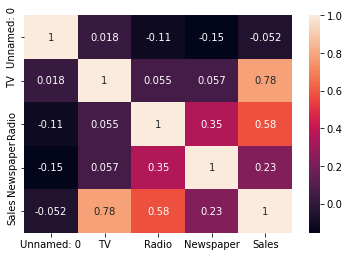

In [10]:
sns.heatmap(df.corr(),annot = True)

VIF

In [11]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,1:4], i))

In [13]:
pd.DataFrame({'vif': vif}, index = df.columns[1:4]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic datasets with multicolinearity 
np.random.seed(42)
X, y = make_regression(n_samples = 100, n_features=3, noise=0.5, random_state = 42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size = 100)

# convert data to a pandas DataFrame
data = pd.DataFrame(X, columns = ['X1','X2','X3'])
data['y'] = y
data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


In [15]:
# Add a constant term to the predictor variable
data_with_constant_all = sm.add_constant(data[['X1', 'X2','X3']])
data_with_constant_reduced = sm.add_constant(data[['X1','X2','X3']])

# create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data["y"],data_with_constant_all).fit()

# print the summary for the model with all predictor
print('Regression Summary for the model with all predictors :')
print(model_all.summary())

Regression Summary for the model with all predictors :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Tue, 18 Jun 2024   Prob (F-statistic):              0.344
Time:                        18:19:02   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic datasets with multicolinearity
np.random.seed(42)
X, y = make_regression(n_samples =100, n_features = 3, noise = 0.5, random_state = 42)
X[:,1] = X[:, 0] + 0.5 * np.random.normal(size = 100) # Introduce multicolinearity between columns 0 and 1

# convert data to a pandas DataFrame
data = pd.DataFrame(X, columns = ['X1','X2','X3'])
data['y'] =y

# calculate correlation matrix 
corr_matrix = data.corr()
print('Correlation Matrix :\n', corr_matrix)

# combine the correlated variable X1 and X2 by taking their average
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1','X2','X3']])
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined','X3']])

#create and fit an OLS model using all three predictor variable
model_all = sm.OLS(data['y'],data_with_constant_all).fit()

# print the summary for the model with all predictors 
print('Regression Summary for the model with all predictors:')
print(model_all.summary())

# create and fit an OLS model using the combined variable with X3
model_combined = sm.OLS(data['y'],data_with_constant_combined).fit()

# print the summary for the model with combined variable and ols 
print('\nRegression Summary for the model with combined predictors (X1_X2_combined and X3):')
print(model_combined.summary())

Correlation Matrix :
           X1        X2        X3         y
X1  1.000000  0.882948 -0.048636  0.148108
X2  0.882948  1.000000 -0.054696  0.165352
X3 -0.048636 -0.054696  1.000000  0.071536
y   0.148108  0.165352  0.071536  1.000000
Regression Summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Tue, 18 Jun 2024   Prob (F-statistic):              0.344
Time:                        18:19:02   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                        

#Partial Least Regression 

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

# Generate a synthetic datasets with multicolinearity 
np.random.seed(42)
X, y = make_regression(n_samples = 100, n_features = 3, noise =  0.5, random_state = 42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size = 100) # Introduce multicolinearity between columns 0 and 1

# convert data to a pandas DataFrame
data = pd.DataFrame(X, columns= ['X1','X2','X3'])
data['y']=y

# split the datasets into training and testing sets 
X_train,X_test,y_train,y_test = train_test_split(data[['X1','X2','X3']], data['y'], test_size = 0.2, random_state= 42)

# Create a PLS model with 2 components
pls_model = PLSRegression(n_components = 2)

# fit the PLS model using the training data
pls_model.fit(X_train,y_train)

# Predict the output using the test data
y_pred = pls_model.predict(X_test)

# calculate the mean squared error of the predictions 
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of PLS model :', mse)

Mean squared error of PLS model : 7359.987203343638
